## Analyze an image with Computer Vision API using Python 

In [18]:
import os
os.chdir('../')
import time
import requests
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Polygon

from PIL import Image
from io import BytesIO

In [27]:
subscription_key = 'd79fe8e294c34578b86dc252b71bb3a6'
vision_base_url = 'https://northeurope.api.cognitive.microsoft.com/vision/v2.0/'
vision_analyze_url = vision_base_url + 'analyze'
image_url = 'https://s3.amazonaws.com/btoimage/prism-thumbnails/articles/5216-2012222-midfield-basadone.jpg-resize_then_crop-_frame_bg_color_FFF-preserve_ratio_true-gravity_center-w_720-h_480_.jpg'

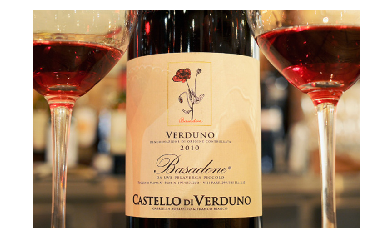

In [28]:
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.show()

In [4]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key }
params   = {'visualFeatures': 'Tags, Description'}
data     = {'url': image_url}
response = requests.post(vision_analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()
analysis = response.json()

In [5]:
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
print(image_caption)

A close up of a bottle and a glass of red wine


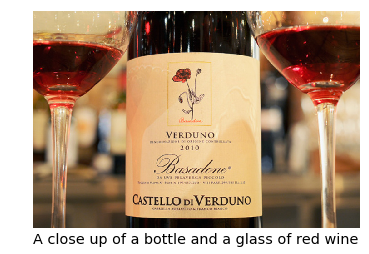

In [6]:
image = Image.open(BytesIO(requests.get(image_url).content))
plt.imshow(image)
plt.axis("off")
plt.title(image_caption, size="x-large", y=-0.1)
plt.show()

## Get a thumbnail with Computer Vision API

In [11]:
thumbnail_url = vision_base_url + "generateThumbnail"

In [12]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'width': '50', 'height': '50','smartCropping': 'true'}
data     = {'url': image_url}
response = requests.post(thumbnail_url, headers=headers, params=params, json=data)
response.raise_for_status()

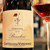

In [13]:
thumbnail = Image.open(BytesIO(response.content))
thumbnail

## Text recognition with Computer Vision API

In [29]:
text_recognition_url = vision_base_url + "RecognizeText"

In [30]:
headers  = {'Ocp-Apim-Subscription-Key': subscription_key}
params   = {'mode' : 'Printed'}
data     = {'url': image_url}
response = requests.post(text_recognition_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [31]:
analysis = {}
while not "recognitionResult" in analysis:
    response_final = requests.get(response.headers["Operation-Location"], headers=headers)
    analysis = response_final.json()
    time.sleep(1)

In [32]:
polygons = [(line["boundingBox"], line["text"]) for line in analysis["recognitionResult"]["lines"]]

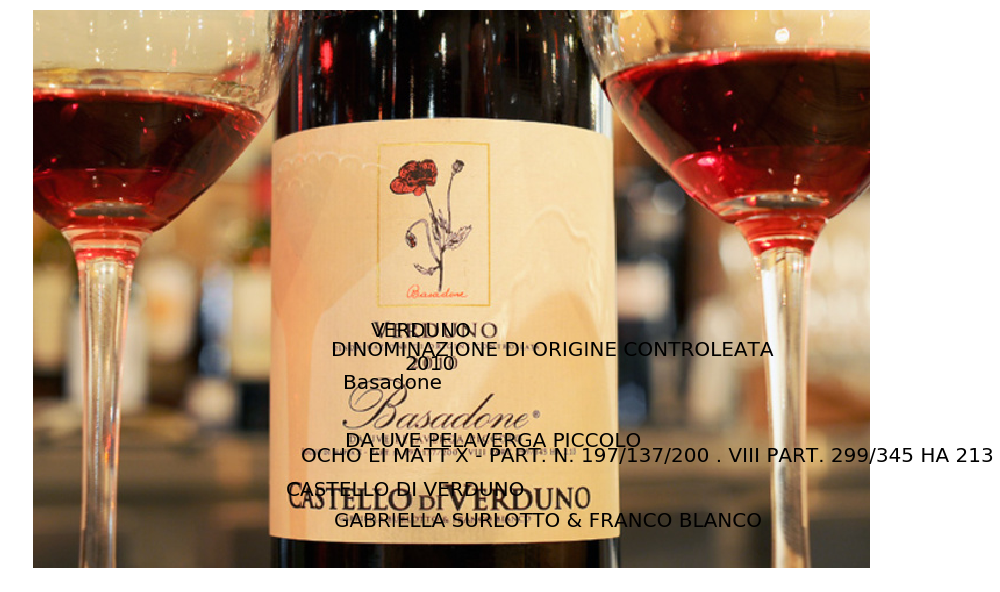

In [34]:
plt.figure(figsize=(15,15))

image  = Image.open(BytesIO(requests.get(image_url).content))
ax     = plt.imshow(image)
for polygon in polygons:
    vertices = [(polygon[0][i], polygon[0][i+1]) for i in range(0,len(polygon[0]),2)]
    text     = polygon[1]
    plt.text(vertices[0][0], vertices[0][1], text, fontsize=20, va="top")
_ = plt.axis("off")